<a href="https://colab.research.google.com/github/geekezhao/Private-Colab-Notebook/blob/main/NLP_getting_start_(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy
import re
import os
import sys
import time

In [3]:
!pip install transformers
!pip install pytorch_lightning
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 3.7 MB/s 
     |████████████████████████████████| 101 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 6.6 MB 44.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 585 kB 5.2 MB/s 
     |████████████████████████████████| 140 kB 67.8 MB/s 
     |████████████████████████████████| 419 kB 44.4 MB/s 
     |████████████████████████████████| 1.1 MB 45.2 MB/s 
     |████████████████████████████████| 271 kB 75.9 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 144 kB 78.9 MB/s 
Looking in indexes: 

# Local Upload and Return File Name Sample

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 987712 bytes


In [8]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')
train_data.to_csv('trained_with_emotion.csv', encoding='sig-utf-8')
files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Input and pre-processing

In [4]:
train_data = pd.read_csv("train.csv")
# test_data = pd.read_csv("test.csv")

## Data Overview

In [5]:
print(train_data.describe())
# print(train_data.head(5))
print(train_data.columns)
print(train_data.shape)

# print('===========^train_data vpredict_data ===========')
# print(test_data.describe())
# # print(test_data.head(5))
# print(test_data.columns)
# print(test_data.shape)

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
(7613, 5)


## Data Type and Null Value

AxesSubplot(0.125,0.125;0.698618x0.755)


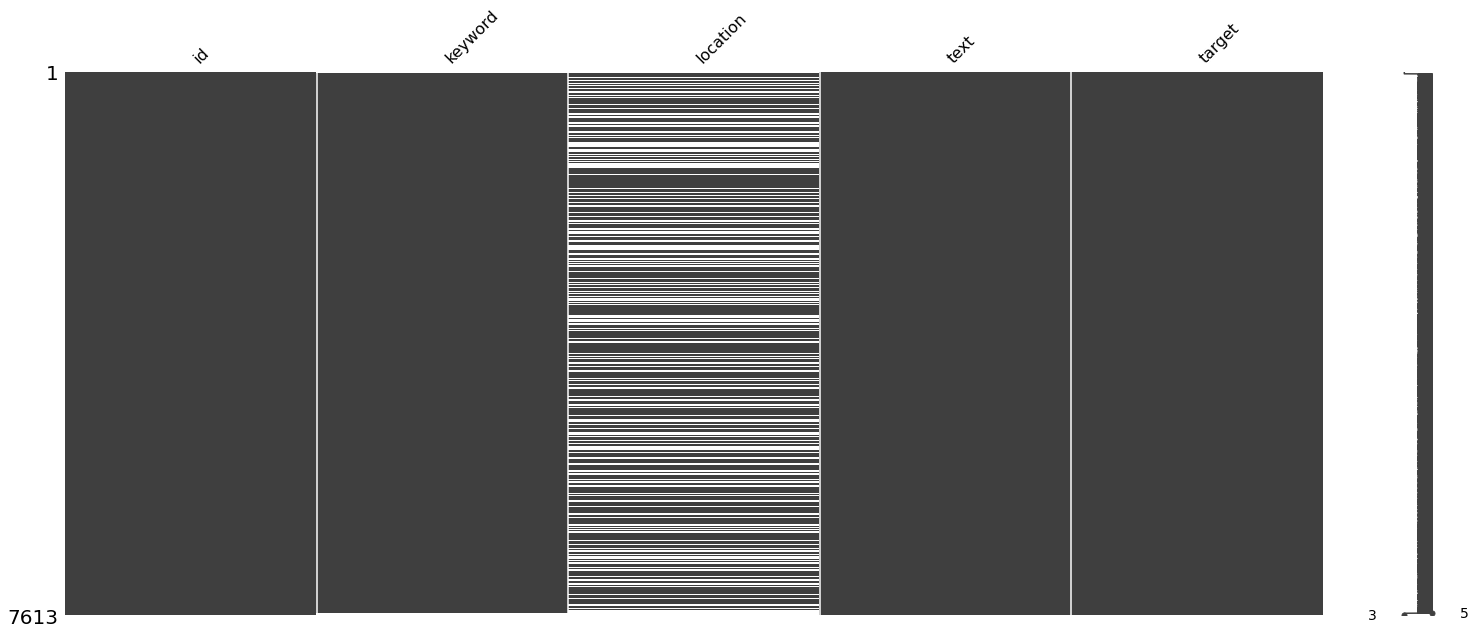

In [6]:
import missingno as msno
print(msno.matrix(train_data))

In [7]:
print(train_data.isnull().sum(axis = 0)) # check missing value in sum
print(train_data.isnull().any()) # check whether there is missing value
print(train_data.dtypes) # if object then missing OR discard the columns

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id          False
keyword      True
location     True
text        False
target      False
dtype: bool
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [8]:
print(train_data[pd.isnull(train_data['keyword'])==False]['keyword'].head())
print(train_data[pd.isnull(train_data['keyword'])==False]['text'].head())


31    ablaze
32    ablaze
33    ablaze
34    ablaze
35    ablaze
Name: keyword, dtype: object
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
32    We always try to bring the heavy. #metal #RT h...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
Name: text, dtype: object


# NLP Detail

## TF-idf

In [9]:
import pprint
import gensim
text_corpus = train_data['text']
documnet = train_data.loc[0, 'text']

In [10]:
# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))

# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

流式输出内容被截断，只能显示最后 5000 行内容。
  'with',
  'hieroglyphics',
  'honors',
  'lowly',
  'king'],
 ['new',
  'world',
  'work',
  'how',
  'young',
  'people',
  'businesses',
  'economies',
  'are',
  'coping',
  'with',
  'huge',
  'upheaval',
  'via'],
 ['look', 'at', 'state', 'actions', 'year', 'after', "ferguson's", 'upheaval'],
 ['oh!', 'how', 'rich', 'how', 'wonderful'],
 ['upheaval', 'blueprint', 'over', 'chris'],
 ['how',
  'long',
  'o',
  'lord',
  '3)',
  'sixth',
  'seal',
  'opens',
  'events',
  'revelation',
  'political',
  'upheaval'],
 ['loan',
  'upheaval',
  'is',
  'way',
  'which',
  'oneself',
  'can',
  'save',
  'your',
  'house',
  'leaving',
  'out',
  'being'],
 ['ancient', 'mayan', 'tablet', 'found', 'temple'],
 ['acquire', 'your', 'straight', 'addition', 'upheaval', 'ideas', 'yet'],
 ['#tigers',
  'wonder',
  'how',
  'much',
  'upheaval',
  'with',
  'team',
  'is',
  'affecting',
  'different',
  'players',
  'tonight?'],
 ['ancient',
  'mayan',
  'tablet',
  '

In [11]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

# pprint.pprint(dictionary.token2id)

Dictionary(7551 unique tokens: ['#earthquake', 'all', 'allah', 'are', 'forgive']...)


In [12]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(3480, 1), (5355, 1)]


In [13]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)

流式输出内容被截断，只能显示最后 5000 行内容。
 [(222, 1),
  (387, 1),
  (2605, 1),
  (6748, 1),
  (7416, 1),
  (7417, 1),
  (7418, 1),
  (7419, 1),
  (7425, 1)],
 [(222, 1),
  (269, 1),
  (1956, 1),
  (2605, 2),
  (3216, 1),
  (6748, 1),
  (7416, 1),
  (7417, 1),
  (7418, 1),
  (7419, 2),
  (7425, 1)],
 [(81, 1),
  (137, 1),
  (159, 1),
  (161, 1),
  (257, 1),
  (683, 1),
  (1017, 1),
  (1593, 1),
  (2885, 1),
  (3537, 1),
  (3647, 1),
  (5685, 1),
  (7404, 1),
  (7406, 1)],
 [(639, 1), (671, 1), (2605, 1), (6748, 1), (7419, 1)],
 [(5, 1),
  (170, 1),
  (231, 1),
  (250, 1),
  (269, 1),
  (294, 1),
  (408, 1),
  (563, 1),
  (720, 1),
  (1041, 1),
  (2012, 1),
  (2913, 1),
  (4764, 1),
  (6757, 1),
  (7404, 1)],
 [(16, 1),
  (63, 1),
  (134, 1),
  (143, 1),
  (222, 1),
  (487, 1),
  (739, 1),
  (1167, 1),
  (1648, 1),
  (1841, 1),
  (1926, 1),
  (3385, 1),
  (3451, 1),
  (3944, 1),
  (4012, 1)],
 [(159, 1), (161, 1), (257, 1), (683, 1), (1017, 1), (3647, 1), (7404, 1)],
 [(17, 1), (357, 1), (5572, 1), (74

In [14]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the string
words = "earthquake".lower().split()
print(tfidf[dictionary.doc2bow(words)])

[(5271, 1.0)]


## re block

In [19]:
urls = re.compile('[a-zA-z]+://[^\s]*')

def num_urls(lines):
  return len(re.findall(urls, lines))

def match_urls(lines):
  return re.findall(urls, lines)

train_data['url_num'] = train_data['text'].map(num_urls)
train_data['urls'] = train_data['text'].map(match_urls)

In [20]:
tags = re.compile('#[a-zA-z]+')

def num_tags(lines):
  return len(re.findall(tags, lines))

def match_tags(lines):
  return re.findall(tags, lines)

train_data['tag_num'] = train_data['text'].map(num_tags)
train_data['tags'] = train_data['text'].map(match_tags)

In [21]:
ats = re.compile('@[a-zA-z]+')

def num_ats(lines):
  return len(re.findall(ats, lines))

def match_ats(lines):
  return re.findall(ats, lines)

train_data['at_num'] = train_data['text'].map(num_ats)
train_data['ats'] = train_data['text'].map(match_ats)

In [23]:
print(train_data.describe())
# print(train_data.head(5))
print(train_data.columns)
print(train_data.shape)
print(train_data.isnull().any()) # check whether there is missing value


                 id      target      url_num      tag_num       at_num
count   7613.000000  7613.00000  7613.000000  7613.000000  7613.000000
mean    5441.934848     0.42966     0.620123     0.429003     0.352686
std     3137.116090     0.49506     0.663930     1.074160     0.708224
min        1.000000     0.00000     0.000000     0.000000     0.000000
25%     2734.000000     0.00000     0.000000     0.000000     0.000000
50%     5408.000000     0.00000     1.000000     0.000000     0.000000
75%     8146.000000     1.00000     1.000000     0.000000     1.000000
max    10873.000000     1.00000     4.000000    13.000000     8.000000
Index(['id', 'keyword', 'location', 'text', 'target', 'url_num', 'urls',
       'tag_num', 'tags', 'at_num', 'ats'],
      dtype='object')
(7613, 11)
id          False
keyword      True
location     True
text        False
target      False
url_num     False
urls        False
tag_num     False
tags        False
at_num      False
ats         False
dtype: bool


## sentiment analysis

Now we already have a trained dataset with emoiton. Why not directly import the dataset?

In [24]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)
  
  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label
  
get_emotion("i feel as if i havent blogged in ages are at least truly blogged i am doing an update cute") # Output: 'joy'
 
get_emotion("i have a feeling i kinda lost my best friend") # Output: 'sadness'


Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:973: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

'<pad> sadness'

In [25]:
train_data['emotion'] = train_data['text'].apply(get_emotion)

In [26]:
print(train_data.describe())
# print(train_data.head(5))
print(train_data.columns)
print(train_data.shape)
print(train_data.isnull().any()) # check whether there is missing value

                 id      target      url_num      tag_num       at_num
count   7613.000000  7613.00000  7613.000000  7613.000000  7613.000000
mean    5441.934848     0.42966     0.620123     0.429003     0.352686
std     3137.116090     0.49506     0.663930     1.074160     0.708224
min        1.000000     0.00000     0.000000     0.000000     0.000000
25%     2734.000000     0.00000     0.000000     0.000000     0.000000
50%     5408.000000     0.00000     1.000000     0.000000     0.000000
75%     8146.000000     1.00000     1.000000     0.000000     1.000000
max    10873.000000     1.00000     4.000000    13.000000     8.000000
Index(['id', 'keyword', 'location', 'text', 'target', 'url_num', 'urls',
       'tag_num', 'tags', 'at_num', 'ats', 'emotion'],
      dtype='object')
(7613, 12)
id          False
keyword      True
location     True
text        False
target      False
url_num     False
urls        False
tag_num     False
tags        False
at_num      False
ats         False
em

In [28]:
from google.colab import files

train_data.to_csv('trained_with_emotion.csv', encoding='utf-8-sig')
files.download('trained_with_emotion.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
train_data.groupby('emotion').count()

,id,keyword,location,text,target,url_num,urls,tag_num,tags,at_num,ats
emotion,,,,,,,,,,,
<pad> True,1,1,1,1,1,1,1,1,1,1,1
<pad> anger,2602,2586,1722,2602,2602,2602,2602,2602,2602,2602,2602
<pad> fear,2288,2257,1526,2288,2288,2288,2288,2288,2288,2288,2288
<pad> joy,1551,1545,1044,1551,1551,1551,1551,1551,1551,1551,1551
<pad> love,93,88,59,93,93,93,93,93,93,93,93
<pad> sadness,1046,1043,707,1046,1046,1046,1046,1046,1046,1046,1046
<pad> surprise,32,32,21,32,32,32,32,32,32,32,32


# Scikit Classification

## KNN

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [ ]:
X = train_data.loc[:, ['url_num','tag_num','at_num']]
y = train_data.loc[:, ['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

print(nca_pipe.score(X_test, y_test))

## DT

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

X = train_data.loc[:, ['url_num','tag_num','at_num']]
y = train_data.loc[:, ['target']]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf)

## cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
